In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import string
import re
from scipy.sparse import hstack

In [24]:
df = pd.read_csv("Final_data.csv")

In [3]:
df.head()

,Unnamed: 0,ix,date,id,link,retweet,text,author,Hashtag count,Punctuation count,Character count,word_count,Mentions Count,Unnamed: 13,Acronym Count,URL Count,Unnamed: 16,combined_vector,clean_text
0,399,399,25-Sep,7.800000e+17,/amardeepkaushal/status/780133028010004481,1,"""@kdnuggets: #icymi #bigdata and the internet ...",various,3,16,136,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets icymi bigdata and the internet of th...
1,5168,5168,11-Jun,7.420000e+17,/EdgarSanchez/status/741764638975500290,1,"""@kdnuggets: r or #python? consider learning b...",various,3,15,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets r or python consider learning both k...
2,5836,5836,28-May,7.370000e+17,/MaxNigrelli72/status/736596414864752641,1,"""@kdnuggets: #deeplearning in a nutshell what...",various,2,17,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets deeplearning in a nutshell what it ...
3,6780,6780,09-May,7.300000e+17,/MaxNigrelli72/status/729768855522906113,1,"""@kdnuggets: how #bigdata helps build smart ci...",various,2,19,124,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets how bigdata helps build smart cities...
4,8993,8993,01-Apr,7.160000e+17,/PrecisionPoint2/status/716037533671534592,1,"""@kdnuggets #machinelearning as a service: how...",various,2,16,130,14,0,NaN,0,2,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets machinelearning as a service how dat...


In [4]:
#Tokenization
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

In [5]:
df.head()

,Unnamed: 0,ix,date,id,link,retweet,text,author,Hashtag count,Punctuation count,Character count,word_count,Mentions Count,Unnamed: 13,Acronym Count,URL Count,Unnamed: 16,combined_vector,clean_text,tokens
0,399,399,25-Sep,7.800000e+17,/amardeepkaushal/status/780133028010004481,1,"""@kdnuggets: #icymi #bigdata and the internet ...",various,3,16,136,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets icymi bigdata and the internet of th...,"[kdnuggets, icymi, bigdata, and, the, internet..."
1,5168,5168,11-Jun,7.420000e+17,/EdgarSanchez/status/741764638975500290,1,"""@kdnuggets: r or #python? consider learning b...",various,3,15,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets r or python consider learning both k...,"[kdnuggets, r, or, python, consider, learning,..."
2,5836,5836,28-May,7.370000e+17,/MaxNigrelli72/status/736596414864752641,1,"""@kdnuggets: #deeplearning in a nutshell what...",various,2,17,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets deeplearning in a nutshell what it ...,"[kdnuggets, deeplearning, in, a, nutshell, wha..."
3,6780,6780,09-May,7.300000e+17,/MaxNigrelli72/status/729768855522906113,1,"""@kdnuggets: how #bigdata helps build smart ci...",various,2,19,124,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets how bigdata helps build smart cities...,"[kdnuggets, how, bigdata, helps, build, smart,..."
4,8993,8993,01-Apr,7.160000e+17,/PrecisionPoint2/status/716037533671534592,1,"""@kdnuggets #machinelearning as a service: how...",various,2,16,130,14,0,NaN,0,2,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets machinelearning as a service how dat...,"[kdnuggets, machinelearning, as, a, service, h..."


In [6]:
# Assuming you have a DataFrame 'df' containing the numeric columns
# Extract the numeric columns from the DataFrame
numeric_columns = df[['Hashtag count', 'Punctuation count', 'Character count', 'word_count', 'Mentions Count', 'Acronym Count', 'URL Count']]

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
max_seq_length = 100
dummy_text = 0 # Define the dummy text

# Pad the tokenized text with the dummy text
padded_tokens = pad_sequences(df['tokens'], maxlen=max_seq_length, padding='post', dtype='object', value=0)

In [9]:
# Convert the numeric columns to a sparse matrix
numeric_matrix = numeric_columns.values

In [10]:
numeric_matrix

array([[  3,  16, 136, ...,   0,   1,   1],
       [  3,  15, 139, ...,   0,   1,   1],
       [  2,  17, 139, ...,   0,   1,   1],
       ...,
       [  0,  11, 146, ...,   0,   0,   1],
       [  0,  12, 145, ...,   1,   0,   1],
       [  0,  11, 136, ...,   0,   0,   1]], dtype=int64)

In [11]:
y = df['retweet']
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: retweet, Length: 2000, dtype: int64

In [12]:
#Train Word2Vec on the tokenized text
model = Word2Vec(df['tokens'], sg=1, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
combined_data = []
for tokens, features in zip(padded_tokens, numeric_matrix):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        # Concatenate the word vectors and the numeric features
        combined_vector = np.concatenate([np.mean(word_vectors, axis=0), features])
        combined_data.append(combined_vector)

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardize the numeric features

scaler = StandardScaler()
numeric_matrix_scaled = scaler.fit_transform(numeric_matrix)

# Combine word embeddings and numeric features
X_combined = np.array(combined_data)

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined,y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [17]:
# Define the RNN model
model_rnn = Sequential()
model_rnn.add(Dense(64, activation='relu', input_dim=X_combined.shape[1]))
model_rnn.add(Dense(1, activation='sigmoid'))


In [18]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 2s 15ms/step - loss: 1.2375 - accuracy: 0.6164 - val_loss: 0.6160 - val_accuracy: 0.5969
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5494 - accuracy: 0.7820 - val_loss: 0.5178 - val_accuracy: 0.8375
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.8062 - val_loss: 0.5096 - val_accuracy: 0.8031
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.8305 - val_loss: 0.4967 - val_accuracy: 0.8125
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4867 - accuracy: 0.8492 - val_loss: 0.4650 - val_accuracy: 0.8594
Epoch 6/10
40/40 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.8531 - val_loss: 0.4462 - val_accuracy: 0.8687
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.8453 - val_loss: 0.4584 - val_accuracy: 0.8313
Epoch 8/10
40/40 [=

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate the model on the test set
y_pred = (model_rnn.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

13/13 [==============================] - 0s 3ms/step


In [22]:
print(" RNN Accuracy:", accuracy)
print("\n Mean Squared Error:", mse)
print("\n Root Mean Squared Error:", rmse)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 RNN Accuracy: 0.8875

 Mean Squared Error: 0.1125

 Root Mean Squared Error: 0.33541019662496846

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       201
           1       0.89      0.88      0.89       199

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [25]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

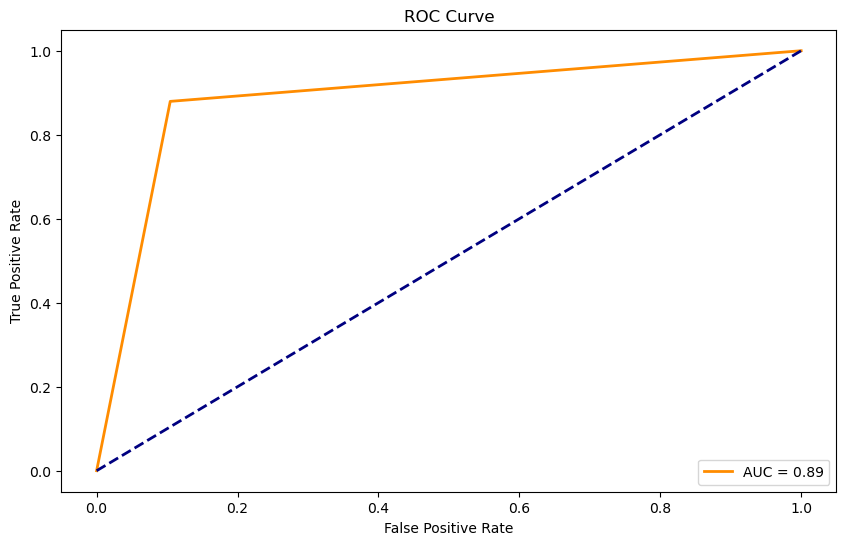

In [26]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
